# TP Mutations et reprogrammation des réseaux booléens

In [1]:
from adys import *

## Mutations pour le réseau ERBB

### Exercice 1

In [2]:
print(ERBB_BN)

fEGF := TRUE;
fERBB1 := EGF;
fERBB2 := EGF;
fERBB3 := EGF;
fERBB1_2 := ERBB1 & ERBB2;
fERBB1_3 := ERBB1 & ERBB3;
fERBB2_3 := ERBB2 & ERBB3;
fIGF1R := (ERa | AKT1) & !ERBB2_3;
fERa := AKT1 | MEK1;
fcMYC := AKT1 | MEK1 | ERa;
fAKT1 := ERBB1 | ERBB1_2 | ERBB1_3 | ERBB2_3 | IGF1R;
fMEK1 := ERBB1 | ERBB1_2 | ERBB1_3 | ERBB2_3 | IGF1R;
fCDK2 := CycE1 & !p21 & !p27;
fCDK4 := CycD1 & !p21 & !p27;
fCDK6 := CycD1;
fCycD1 := AKT1 | MEK1 | ERa | cMYC;
fCycE1 := cMYC;
fp21 := ERa & !AKT1 & !cMYC & !CDK4;
fp27 := ERa & !CDK4 & !CDK2 & !AKT1 & !cMYC;
fpRB := (CDK4 & CDK6);


In [3]:
bn_prelim = parse_bn(ERBB_BN)

(1) Il est possible d'activer pRB depuis l'état initial où EGF est actif

In [4]:
smv = bn2smv(bn_prelim, "async", init={"EGF"})
append_line(smv, "CTLSPEC EF pRB;")
NuSMV(smv)

-- specification EF pRB  is true


(2) Désactivation de ERa:

In [5]:
bn_koERa = bn_prelim.copy()
bn_koERa["ERa"] = "FALSE"

In [6]:
smv = bn2smv(bn_koERa, "async", init={"EGF"})
append_line(smv, "CTLSPEC EF pRB;")
NuSMV(smv)

-- specification EF pRB  is true


Le modèle préliminaire n'est pas correct car il ne peut pas reproduire l'effet de la mutation de ERa.

### Exercice 2

(1) Oui, la modification est compatible car on n'ajoute pas de variable, et on ne change pas leur signe.

(2) Réseau corrigé:

In [7]:
bn_wt = bn_prelim.copy()
bn_wt["CycD1"] = "(AKT1|MEK1) & ERa & cMYC"

(3) Sans mutations, on peut bien activer pRB:

In [8]:
smv = bn2smv(bn_wt, "async", init={"EGF"})
append_line(smv, "CTLSPEC EF pRB")
NuSMV(smv)

-- specification EF pRB  is true


(4) La mutation de ERa bloque pRB:

In [9]:
bn_koERa = bn_wt.copy()
bn_koERa["ERa"] = "FALSE"
smv = bn2smv(bn_koERa, "async", init={"EGF"})
append_line(smv, "CTLSPEC EF pRB")
NuSMV(smv)

-- specification EF pRB  is false


(5) Désactivation de cMYC:

In [10]:
bn_koCMYC = bn_wt.copy()
bn_koCMYC["cMYC"] = "FALSE"
smv = bn2smv(bn_koCMYC, "async", init={"EGF"})
append_line(smv, "CTLSPEC EF pRB")
NuSMV(smv)

-- specification EF pRB  is false


oui, cMYC bloque bien pRB.

### Exercice 3

In [11]:
bn_kip21 = bn_wt.copy()
bn_kip21["p21"] = "TRUE"
smv = bn2smv(bn_kip21, "async", init={"EGF", "p21"})
append_line(smv, "CTLSPEC EF pRB")
NuSMV(smv)

-- specification EF pRB  is false


### Exercice 4

(1) Les attracteurs du réseau sans mutation vérifient bien pRB et CycE1 actifs constamment:

In [12]:
smv = bn2smv(bn_wt, "async", init={"EGF"})
append_line(smv, "CTLSPEC AG EF AG (pRB & CycE1)")
NuSMV(smv)

-- specification AG (EF (AG (pRB & CycE1)))  is true


(2)

In [13]:
bn_koERa = bn_wt.copy()
bn_koERa["ERa"] = "FALSE"
smv = bn2smv(bn_koERa, "async", init={"EGF"})
append_line(smv, "CTLSPEC AG EF AG (!pRB & CycE1)")
NuSMV(smv)

-- specification AG (EF (AG (!pRB & CycE1)))  is true


In [14]:
bn_koCMYC = bn_wt.copy()
bn_koCMYC["cMYC"] = "FALSE"
smv = bn2smv(bn_koCMYC, "async", init={"EGF"})
append_line(smv, "CTLSPEC AG EF AG (!pRB & CycE1)")
NuSMV(smv)

-- specification AG (EF (AG (!pRB & CycE1)))  is false


In [15]:
bn_kip21 = bn_wt.copy()
bn_kip21["p21"] = "TRUE"
smv = bn2smv(bn_kip21, "async", init={"EGF", "p21"})
append_line(smv, "CTLSPEC AG EF AG (!pRB & CycE1)")
NuSMV(smv)

-- specification AG (EF (AG (!pRB & CycE1)))  is true


On constate que la désactivation de ERa et l'activation de p21 sont des mutations acceptables, mais pas la désactivation de cMYC.

### Exercice 5

(1) Liste complète des désactivations forcées qui fonctionnent:

In [16]:
for n in sorted(bn_wt):
    if n in ["EGF","pRB"]:
        continue
    bn_mod = bn_wt.copy()
    bn_mod[n] = "FALSE"
    smv = bn2smv(bn_mod, "async", init={"EGF"})
    append_line(smv, "CTLSPEC AG EF AG (!pRB & CycE1)")
    r = NuSMV(smv, parse=True)
    if r[0]:
        print("Mutation effective: **KO %s**" % n)

Mutation effective: **KO CDK4**
Mutation effective: **KO CDK6**
Mutation effective: **KO CycD1**
Mutation effective: **KO ERa**


(2) Liste complète des activations forcées qui fonctionnent:

In [17]:
for n in sorted(bn_wt):
    if n in ["EGF","pRB"]:
        continue
    bn_mod = bn_wt.copy()
    bn_mod[n] = "TRUE"
    smv = bn2smv(bn_mod, "async", init={"EGF", n})
    append_line(smv, "CTLSPEC AG EF AG (!pRB & CycE1)")
    r = NuSMV(smv, parse=True)
    if r[0]:
        print("Mutation effective: **UP %s**" % n)

Mutation effective: **UP p21**
Mutation effective: **UP p27**


(3)

In [18]:
nb_ko = 18 - 4
nb_up = 18 - 2
(nb_ko*(nb_ko-1))/2 + (nb_up*(nb_up-1))/2 + (nb_ko*nb_up)-(18-6)

423.0

Vérification manuelle (non démandée):

In [19]:
ko = ["-%s" % n for n in bn_wt if n not in ["EGF","pRB","CDK4","CDK6","CycD1","ERa"]]
up = ["+%s" % n for n in bn_wt if n not in ["EGF","pRB","p21", "p27"]]
couples = set()
for a in ko+up:
    for b in ko+up:
        if a[1:] == b[1:]:
            continue
        couples.add((min(a,b),max(a,b)))
len(couples)

423

## Trans-différentiation et dé-différentiation cellulaire

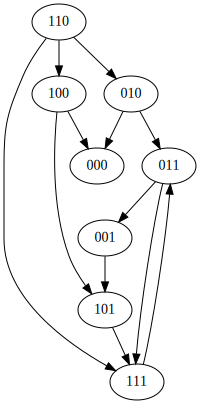

In [20]:
g = stategraph("reseau1.bn", "async")
g

### Exercice 6

In [21]:
def attractors(g):
    def is_terminal(scc):
        for x in scc:
            for y in g[x]:
                if y not in scc:
                    return False
        return True
    return [scc for scc in g.tarjan() if is_terminal(scc)]

In [22]:
a = attractors(g)
a

[{001, 011, 101, 111}, {000}]

In [23]:
b = basins(g, a)
b

{000: {1},
 001: {0},
 010: {0, 1},
 011: {0},
 100: {0, 1},
 101: {0},
 110: {0, 1},
 111: {0}}

### Exercice 7

(1)

In [24]:
def controls(g,b):
    c = set() # ensemble des états décisifs
    # on parcourt tous les états
    for x in b:
        nb = len(b[x]) # nombre d'attracteurs atteignables depuis x
        # XXX si un des enfants de x a strictement moins d'attracteurs
        # alors ajouter x dans c (c.add(x))
        for y in g[x]:
            if len(b[y]) < nb:
                c.add(x)
    return c

In [25]:
controls(g,b)

{010, 100, 110}

(2) 

In [26]:
g_sync = stategraph("reseau1.bn","sync")
a_sync = attractors(g_sync)
b_sync = basins(g_sync, a_sync)
controls(g_sync,b_sync)

set()

In [27]:
g_gen = stategraph("reseau1.bn","general")
a_gen = attractors(g_gen)
b_gen = basins(g_gen, a_gen)
controls(g_gen,b_gen)

{010, 100, 110}

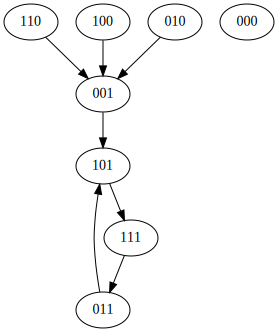

In [28]:
g_sync

### Exercice 8
(1)

In [29]:
def jump(x,y,b):
    # dans le pire des cas, la réponse est y
    best = y # réponse
    nb_mod = x.dst(y) # nombre de modifications
    # on parcourt tous les états z
    for z in b:
        if b[z] == b[y]: # z ne peut atteindre que y
            dstz = x.dst(z)
            if dstz < nb_mod:
                nb_mod = dstz
                best = z
    return best

In [30]:
x = state(0,0,0)
y = state(1,1,1)
jump(x,y,b)

001

(2)

In [31]:
smv = bn2smv("reseau1.bn", "async")
append_line(smv, "CTLSPEC (!x1&!x2&x3 -> AG EF (x1&x2&x3))")
NuSMV(smv)

/home/pauleve/orga/baskets/basket85/TP/reseau1-async.smv

-- specification (((!x1 & !x2) & x3) -> AG (EF ((x1 & x2) & x3)))  is true


###  Exercice 9
(1)

In [32]:
def rewind(x,y,b):
    best = None # aucune réponse
    nb_mod = len(x)+1 # on ne peut pas faire pire
    for z in b:
        if b[z].issuperset(b[x]) and b[z].issuperset(b[y]):
            dstz = x.dst(z)
            if dstz < nb_mod:
                nb_mod = dstz
                best = z
    return best       

In [33]:
rewind(x,y,b)

100

(note: plusieurs réponses sont possibles)

(2)

In [34]:
smv = bn2smv("reseau1.bn", "async")
append_line(smv, "CTLSPEC (x1&!x2&!x3) -> EF (x1&x2&x3) & EF (!x1&!x2&!x3)")
NuSMV(smv)

/home/pauleve/orga/baskets/basket85/TP/reseau1-async.smv

-- specification (((x1 & !x2) & !x3) -> (EF ((x1 & x2) & x3) & EF ((!x1 & !x2) & !x3)))  is true


(3) Quand les bassins d'attractions de x et y sont disjoints.
En particulier, en sémantique synchrone, cette fonction renvoie toujours None car un état est toujours connecté à un unique attracteur.

### Exercice 10

In [35]:
f = parse_bn("""
f1 := x2;
f2 := x1;
f3 := x2 | !x4;
f4 := x5;
f5 := !x3;
""")

(1)

In [36]:
gf = stategraph(f, "async")

In [37]:
af = attractors(gf)
af

[{11100}, {00100}, {00011}]

(2)

In [38]:
bf = basins(gf, af)
x = state(1,1,1,0,0)
y = state(0,0,0,1,1)
z = jump(x,y,bf)
x.dst(z)

5

(3)

In [39]:
x.dst(rewind(x,y,bf))

2

(4)

In [40]:
y.dst(jump(y,x,bf))

2

In [41]:
y.dst(rewind(y,x,bf))

1

### Exercice 11

In [42]:
def jump(x,y,b):
    # dans le pire des cas, la réponse est y
    best = set([y]) # réponse
    nb_mod = x.dst(y) # nombre de modifications
    # on parcourt tous les états z
    for z in b:
        if b[z] == b[y]: # z ne peut atteindre que y
            dstz = x.dst(z)
            if dstz < nb_mod:
                nb_mod = dstz
                best = set([z])
            elif dstz == nb_mod:
                best.add(z)
    return best

In [43]:
x = state(0,0,0)
y = state(1,1,1)
jump(x,y,b)

{001}

In [44]:
def rewind(x,y,b):
    best = set() # aucune réponse
    nb_mod = len(x)+1 # on ne peut pas faire pire
    for z in b:
        if b[z].issuperset(b[x]) and b[z].issuperset(b[y]):
            dstz = x.dst(z)
            if dstz < nb_mod:
                nb_mod = dstz
                best = set([z])
            elif dstz == nb_mod:
                best.add(z)
    return best  

In [45]:
rewind(x,y,b)

{010, 100}